<p style="font-family: Arial; font-size:2.75em;color:blue; font-style:bold"><br>
Projet 6 :<br><br>
Catégorisez automatiquement des questions<br><br>
</p><br>

* **Data Source / Data Source :** 
    - Data :
        - Outils d'extraction de data : https://data.stackexchange.com/stackoverflow
        - Script : https://github.com/EricJacquesPro/TextCategorization/blob/master/SQL/ExtractionDonnees.sql
    - Source Python : https://github.com/EricJacquesPro/TextCategorization
* **Description / Description : ** Projet 6 de la formation Data Scientist Proposée par OpenClassroom
    - Analyse
    - Entrainement
* **Auteur / Author : ** Eric JACQUES 
* **Date : ** 06/08/2019 

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
I - Sélection des datas entrantes</p>

Stack overfloaw met a disposition un outils en ligne permettant d'extraire le contenu de post diffusés sur le site internet.
(https://data.stackexchange.com/stackoverflow)<br>
En se basant sur la structure de la base de données(https://i.stack.imgur.com/JZHsN.png), il en ressort des données (tables) plus intéressantes que d'autres : Post, type de post, Tag, tags des posts <br>
Pour notre cas, tous les posts ne sont pas intéressants : Supprimé, score null, sans réponse, type de post....<br>
<br>
Parmis les posts, les données les plus explicites qui permettent de connaitre leurs sujets sont le body.<br>
<br>
Script téléchargeable sur https://github.com/EricJacquesPro/TextCategorization/blob/master/SQL/ExtractionDonnees.sql



<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
II - Data cleaning & preprocessing</p>

In [1]:
import sys
import os
import numpy as np
import pandas as pd
sys.path.insert(0, './Python/')

In [2]:
'''
python class for the data engineering (reading, cleaning, training...)
localised in ./Python
'''
from tagText import TagText 

C:\Users\naru_\Anaconda3\lib\site-packages\gensim\utils.py:865: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [3]:
cluster_number_min = 2
cluster_number_max = 10
cluster_number_step = 2

tagText = TagText()
print(tagText.urlDirectory)#folder for cvs file generated by SQL query (cf. I) 
print(tagText.fileName)#name of the cvs file generated by SQL query (cf. I)
tagText.nombre_post_entree = 4000
tagText.precision = 4000
data_question = tagText.read_source()
data_question.head()

Data/
QuestionVsTags.csv


,Id,body,title,tags,SelectedTags,Name
0,11227809,<p>Here is a piece of C++ code that shows some...,Why is processing a sorted array faster than p...,<java><c++><performance><optimization><branch-...,"java,c++,performance,optimization,",Question
1,927358,<p>I accidentally committed the wrong files to...,How do I undo the most recent local commits in...,<git><version-control><git-commit><undo><pre-c...,"git,version-control,git-commit,",Question
2,2003505,<p>I want to delete a branch both locally and ...,How do I delete a Git branch locally and remot...,<git><version-control><git-branch><git-push><g...,"git,version-control,git-branch,git-push,",Question
3,292357,<p>What are the differences between <code>git ...,What is the difference between 'git pull' and ...,<git><version-control><git-pull><git-fetch>,"git,version-control,",Question
4,477816,"<p>I've been messing around with <a href=""http...",What is the correct JSON content type?,<json><http-headers><content-type>,"json,http-headers,content-type,",Question


In [4]:
data_question.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,4000.0,6.089163e+06,8.258710e+06,4.0,727942.5,2735329.5,7964911.25,57456188.0


In [5]:
print(tagText.stopwords)
'''Stop word issu to nltk.corpus'''

{'the', 'who', 'mustn', "that'll", 'under', 'himself', "mightn't", 'does', "won't", 'their', 'from', 'in', 'didn', 'were', 'your', 'was', 'while', 'such', 'just', 'for', 'after', "you'll", 'ours', 've', 'during', 'ourselves', 'wouldn', 'wasn', 'up', 'own', 'having', 'what', 'other', 'both', 'she', "aren't", 'herself', 'he', 'by', "couldn't", "shan't", 'you', 'whom', 'more', 'hers', 'or', 'yours', 'into', 'yourselves', "haven't", 'our', 'to', 'do', 'aren', 'weren', "you've", 'doesn', 'isn', "hasn't", 'itself', 'his', 'my', 'most', 'its', 'because', 'not', 'with', 'before', 'them', "she's", 'as', 'should', "wouldn't", 'further', 'only', 'ma', "you're", 'then', 'where', 'too', "hadn't", 'had', 'no', 'd', "shouldn't", 'this', 'if', 'mightn', 'again', "it's", 'myself', 'we', 't', 'of', 'so', 'll', 'can', 'her', 'themselves', "didn't", 'how', 'above', 'me', "mustn't", 'o', 'which', 'ain', 'over', 'shan', 'but', 'don', 'will', 'being', 'below', 'am', 'those', 'some', 'down', 'has', 'couldn', 

'Stop word issu to nltk.corpus'

In [6]:
data_question['body'][1:9]

1    <p>I accidentally committed the wrong files to...
2    <p>I want to delete a branch both locally and ...
3    <p>What are the differences between <code>git ...
4    <p>I've been messing around with <a href="http...
5    <p>What is the use of the <code>yield</code> k...
6    <p>I mistakenly added files to Git using the c...
7    <p>After reading <a href="http://groups.google...
8    <p>I don't want to rename a remote branch, as ...
Name: body, dtype: object

nltk stop word are not efficient.
There are lot of html and punctuation caracters

In [4]:
data_preprocessed = data_question['body'].apply(tagText.preprocessing)
print(data_preprocessed[1:9])

1    accidentally committed wrong files git pushed ...
2    want delete branch locally remotely failed att...
3                       differences git pull git fetch
4    ive messing around json time pushing text hurt...
5    use yield keyword python do example im trying ...
6    mistakenly added files git using command git a...
7    reading hidden features dark corners cstl comp...
8    want rename remote branch described rename mas...
Name: body, dtype: object


In [8]:
data_question.head()

,Id,body,title,tags,SelectedTags,Name
0,11227809,<p>Here is a piece of C++ code that shows some...,Why is processing a sorted array faster than p...,<java><c++><performance><optimization><branch-...,"java,c++,performance,optimization,",Question
1,927358,<p>I accidentally committed the wrong files to...,How do I undo the most recent local commits in...,<git><version-control><git-commit><undo><pre-c...,"git,version-control,git-commit,",Question
2,2003505,<p>I want to delete a branch both locally and ...,How do I delete a Git branch locally and remot...,<git><version-control><git-branch><git-push><g...,"git,version-control,git-branch,git-push,",Question
3,292357,<p>What are the differences between <code>git ...,What is the difference between 'git pull' and ...,<git><version-control><git-pull><git-fetch>,"git,version-control,",Question
4,477816,"<p>I've been messing around with <a href=""http...",What is the correct JSON content type?,<json><http-headers><content-type>,"json,http-headers,content-type,",Question


In [9]:
data_preprocessed.describe()

count                                                  4000
unique                                                 4000
top       left pad int zeros converting string java im b...
freq                                                      1
Name: body, dtype: object

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
III - Data - Bag of words</p>

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
III.1 - Data - Bag of words - most frequent data</p>

In [10]:
import nltk
print(nltk.word_tokenize(data_preprocessed[0])[0:10])
print(nltk.tokenize.WhitespaceTokenizer().tokenize(data_preprocessed[0])[0:10])
# Tokenize using Punctuations
print(nltk.tokenize.WordPunctTokenizer().tokenize(data_preprocessed[0])[0:10])
print(nltk.tokenize.TreebankWordTokenizer().tokenize(data_preprocessed[0])[0:10])

['piece', 'c', 'code', 'shows', 'peculiar', 'behavior', 'strange', 'reason', 'sorting', 'data']
['piece', 'c', 'code', 'shows', 'peculiar', 'behavior', 'strange', 'reason', 'sorting', 'data']
['piece', 'c', 'code', 'shows', 'peculiar', 'behavior', 'strange', 'reason', 'sorting', 'data']
['piece', 'c', 'code', 'shows', 'peculiar', 'behavior', 'strange', 'reason', 'sorting', 'data']


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
III.2 - Data - Bag of words - Nb of occurence</p>

In [11]:
import nltk
from collections import defaultdict
    
corpora = defaultdict(list)
        
tokenizer = nltk.RegexpTokenizer(r'\w+')
for id, row in data_preprocessed.iteritems():
    for word in tokenizer.tokenize(row):
        if not word in corpora :
            corpora[word] = 0
        #print(word)
        corpora[word] += 1
    

#print(corpora)
#print(sorted(corpora.items(), reverse=True,  key=lambda x: x[1]))

In [12]:
import matplotlib.pyplot as plt
minimum_count = 200
def count_word_occurencies(df):
        corpora = defaultdict(list)                
        tokenizer = nltk.RegexpTokenizer(r'\w+')
        for id, row in df.iteritems():
            for word in tokenizer.tokenize(row):
                if not word in corpora :
                    corpora[word] = 0
                #print(word)
                corpora[word] += 1
        corpora = dict((k, v) for k, v in corpora.items() if ((v > minimum_count)))
        sorted(corpora)
        max_occurence = max(corpora.values())
        min_occurence = (corpora.values())
        min_occurence = min(corpora.values())
        quartil1 =  np.percentile(list(corpora.values()), 25)
        quartil3 =  np.percentile(list(corpora.values()), 75)
        inter_quartil_range = quartil3 - quartil1
        lower_bound = quartil1 -(1.5 * inter_quartil_range) 
        upper_bound = quartil3 +(1.5 * inter_quartil_range) 
        print (min_occurence)
        print (max_occurence)
        print (quartil1)
        print (quartil3)
        print (inter_quartil_range)
        print (lower_bound)
        print (upper_bound)
        #plt.boxplot(corpora.items())
        #print(corpora.values())
        #quartil1 = np.percentile(corpora.values(),25)
        corpora = dict((k, v) for k, v in corpora.items() if ((v > 1)))# and (v > lower_bound) and (v < upper_bound)))
        return (sorted(corpora.items(), reverse=True,  key=lambda x: x[1]))

dico = count_word_occurencies(data_preprocessed)


In [13]:
dico = count_word_occurencies(data_preprocessed)

203
1405
250.0
484.0
234.0
-101.0
835.0


In [14]:
len(dico)

125

In [15]:
dico

[('like', 1405),
 ('using', 1229),
 ('use', 1190),
 ('want', 1125),
 ('way', 1115),
 ('im', 1076),
 ('code', 1031),
 ('file', 1030),
 ('git', 1010),
 ('would', 960),
 ('get', 949),
 ('new', 850),
 ('one', 845),
 ('this', 834),
 ('string', 789),
 ('1', 736),
 ('function', 638),
 ('know', 610),
 ('need', 579),
 ('example', 576),
 ('error', 566),
 ('ive', 554),
 ('class', 552),
 ('c', 546),
 ('something', 545),
 ('it', 507),
 ('files', 501),
 ('2', 500),
 ('following', 498),
 ('return', 496),
 ('python', 495),
 ('work', 484),
 ('data', 481),
 ('id', 476),
 ('var', 468),
 ('0', 467),
 ('branch', 455),
 ('set', 452),
 ('value', 452),
 ('object', 442),
 ('public', 440),
 ('div', 433),
 ('method', 426),
 ('list', 423),
 ('javascript', 410),
 ('find', 406),
 ('also', 401),
 ('int', 398),
 ('line', 381),
 ('see', 374),
 ('name', 373),
 ('question', 370),
 ('command', 368),
 ('3', 360),
 ('make', 360),
 ('tried', 358),
 ('array', 351),
 ('time', 340),
 ('trying', 338),
 ('could', 336),
 ('create

In [16]:
print(tagText.count_word_occurencies(data_preprocessed))

[('like', 1405), ('using', 1229), ('use', 1190), ('want', 1125), ('way', 1115), ('im', 1076), ('code', 1031), ('file', 1030), ('git', 1010), ('would', 960), ('get', 949), ('new', 850), ('one', 845), ('this', 834), ('string', 789), ('1', 736), ('function', 638), ('know', 610), ('need', 579), ('example', 576), ('error', 566), ('ive', 554), ('class', 552), ('c', 546), ('something', 545), ('it', 507), ('files', 501), ('2', 500), ('following', 498), ('return', 496), ('python', 495), ('work', 484), ('data', 481), ('id', 476), ('var', 468), ('0', 467), ('branch', 455), ('set', 452), ('value', 452), ('object', 442), ('public', 440), ('div', 433), ('method', 426), ('list', 423), ('javascript', 410), ('find', 406), ('also', 401), ('int', 398), ('line', 381), ('see', 374), ('name', 373), ('question', 370), ('command', 368), ('make', 360), ('3', 360), ('tried', 358), ('array', 351), ('time', 340), ('trying', 338), ('could', 336), ('create', 332), ('add', 331), ('two', 330), ('used', 328), ('run', 

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
III.2 - Data - Bag of words - TF-IDF</p>

In [17]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

stemmer = nltk.stem.porter.PorterStemmer()
stopword = nltk.corpus.stopwords.words('english')

#X = data_preprocessed.unique()
X = data_preprocessed[0:9].unique()

def stem_and_filter(doc):
    tokens = [stemmer.stem(w) for w in analyzer(doc)]
    return [token for token in tokens if token.isalpha()]

analyzer = TfidfVectorizer().build_analyzer()
cv = TfidfVectorizer(lowercase=True, stop_words="english", analyzer=stem_and_filter, min_df=0.00, max_df=0.3)  # we remove words if it appears in more than 30 % of the corpus (not found stopwords like Box, Christmas and so on)
word_count_vector = cv.fit_transform(X)
print("TF_IDF_matrix :", word_count_vector.shape, "of", word_count_vector.dtype)
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)
# print idf values
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["tf_idf_weights"])
 
# sort ascending
df_idf.sort_values(by=['tf_idf_weights'])


TF_IDF_matrix : (9, 247) of float64


,tf_idf_weights
file,2.203973
time,2.203973
int,2.203973
branch,2.203973
start,2.203973
thi,2.203973
return,2.203973
tri,2.203973
piec,2.203973
repositori,2.203973


In [18]:
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.decomposition import LatentDirichletAllocation
no_topics = 20
documents = data_preprocessed.unique()

tf_vectorizer = CountVectorizer(
    max_df=0.95,
    min_df=2, 
    max_features=1000,
    stop_words='english'
)
tf = tf_vectorizer.fit_transform(documents)

# Run LDA
lda = LatentDirichletAllocation(n_topics=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

'''
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic :", topic_idx, ":" )
        print (" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
'''

no_top_words = 5
tagText.display_topics(lda, tf_vectorizer.get_feature_names(), no_top_words)
print(tf_vectorizer.get_feature_names())
print(lda)


C:\Users\naru_\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


Topic : 0 :
command line run windows process
Topic : 1 :
git branch commit changes repository
Topic : 2 :
int code data return const
Topic : 3 :
table select database data sql
Topic : 4 :
python key error code add
Topic : 5 :
use function code like list
Topic : 6 :
im files server using request
Topic : 7 :
question use ive im answer
Topic : 8 :
way like object var want
Topic : 9 :
class string public new method
Topic : 10 :
div script button click path
Topic : 11 :
lines language programming container docker
Topic : 12 :
error install image npm module
Topic : 13 :
difference php mean whats use
Topic : 14 :
text set using page html
Topic : 15 :
user view app service 000
Topic : 16 :
test join address email abc
Topic : 17 :
version date console loaded versions
Topic : 18 :
file directory echo filename nan
Topic : 19 :
loadmodule eclipse vim apply testing
['000', '10', '100', '1000', '11', '12', '123', '13', '15', '16', '20', '2010', '23', '25', '26', '30', '32', '50', '80', 'abc', 'able'

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
IV - Data - Tag genetaor </p>

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
IV.1 - Data - Tag generator - Unsupervised - By nb of occurence</p>

In [19]:
dict_tag = count_word_occurencies(data_preprocessed)
dict_tag = str(dict_tag)
dict_tag


203
1405
250.0
484.0
234.0
-101.0
835.0


"[('like', 1405), ('using', 1229), ('use', 1190), ('want', 1125), ('way', 1115), ('im', 1076), ('code', 1031), ('file', 1030), ('git', 1010), ('would', 960), ('get', 949), ('new', 850), ('one', 845), ('this', 834), ('string', 789), ('1', 736), ('function', 638), ('know', 610), ('need', 579), ('example', 576), ('error', 566), ('ive', 554), ('class', 552), ('c', 546), ('something', 545), ('it', 507), ('files', 501), ('2', 500), ('following', 498), ('return', 496), ('python', 495), ('work', 484), ('data', 481), ('id', 476), ('var', 468), ('0', 467), ('branch', 455), ('set', 452), ('value', 452), ('object', 442), ('public', 440), ('div', 433), ('method', 426), ('list', 423), ('javascript', 410), ('find', 406), ('also', 401), ('int', 398), ('line', 381), ('see', 374), ('name', 373), ('question', 370), ('command', 368), ('3', 360), ('make', 360), ('tried', 358), ('array', 351), ('time', 340), ('trying', 338), ('could', 336), ('create', 332), ('add', 331), ('two', 330), ('run', 328), ('used',

In [20]:
def unsupervised_tag(dict_word_key, new_question, number_max_tag):
    tags = [word for word in new_question.split() if (word in dict_word_key)]
    return tags[0:number_max_tag]

print(unsupervised_tag(dict_tag, "How save my code source with soft like git", 20))
print(unsupervised_tag(dict_tag, "How save my code source with soft like like git", 2))
#for word in "like git branche totot, test".split() if (word in dict_word_key)

['code', 'with', 'like', 'git']
['code', 'with']


In [21]:
tagText.unsupervised_tag(dict_tag, "How save my code source with soft like git", 2)

['code', 'with']

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
IV.2-a - Data - Tag generator - Unsupervised - LDA</p>

In [22]:
tf = word_count_vector

from sklearn.decomposition import LatentDirichletAllocation
no_topics = 20
'''
tf_vectorizer = COuntVectorizer(max_df)
tf = tf_vectorizer.fit_transform(documents)
'''
# Run LDA
lda = LatentDirichletAllocation(n_topics=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)


def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic :", topic_idx, ":" )
        print (" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 5
display_topics(lda, cv.get_feature_names(), no_top_words)
# reprendre forcement avec countVectorizer

Topic : 0 :
file add way result around
Topic : 1 :
class arrays renam node textxjson
Topic : 2 :
bugfix that anomali thing result
Topic : 3 :
java question way def browser
Topic : 4 :
schulz undo issu mani applicationjson
Topic : 5 :
renam uptod need visual getchildcandid
Topic : 6 :
void textxjavascript sort selfrightchild use
Topic : 7 :
anybodi file cstl data stdsortdata
Topic : 8 :
gather describ use well iostream
Topic : 9 :
describ initi python support one
Topic : 10 :
almost behavior resultextendnodevalu follow goe
Topic : 11 :
file elapsedtim return selfmedian next
Topic : 12 :
stdrand support class getchildcandidatesself resultextendnodevalu
Topic : 13 :
selfrightchild getchildcandid subsequ text ad
Topic : 14 :
sum dataarrays distanc thing assum
Topic : 15 :
json add around commit again
Topic : 16 :
keyword piec branch gener second
Topic : 17 :
master dataarrays commit like textjavascript
Topic : 18 :
gcc clockspersec remotesoriginbugfix selfmedian understand
Topic : 19 :
des

C:\Users\naru_\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


In [23]:
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.decomposition import LatentDirichletAllocation
no_topics = 20
documents = data_preprocessed[0:9].unique()

tf_vectorizer = CountVectorizer(
    max_df=0.95,
    min_df=2, 
    max_features=1000,
    stop_words='english'
)
tf = tf_vectorizer.fit_transform(documents)

# Run LDA
lda = LatentDirichletAllocation(n_topics=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

'''
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic :", topic_idx, ":" )
        print (" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
'''

no_top_words = 5
tagText.display_topics(lda, tf_vectorizer.get_feature_names(), no_top_words)
print(tf_vectorizer.get_feature_names())
print(lda)


Topic : 0 :
branch git remote local want
Topic : 1 :
branch similar returned new undo
Topic : 2 :
start main include result undo
Topic : 3 :
local want include start commit
Topic : 4 :
id new int pushed start
Topic : 5 :
git files commit undo pushed
Topic : 6 :
remote result main undo start
Topic : 7 :
undo pull int remote returned
Topic : 8 :
piece local code files returned
Topic : 9 :
id branch undo code start
Topic : 10 :
git pull similar returned include
Topic : 11 :
id local int main result
Topic : 12 :
piece returned undo branch want
Topic : 13 :
int code start include id
Topic : 14 :
undo include remote returned id
Topic : 15 :
remote local similar include returned
Topic : 16 :
main pull local start files
Topic : 17 :
commit files id new start
Topic : 18 :
result code returned int piece
Topic : 19 :
piece int local pushed start
['branch', 'code', 'commit', 'files', 'git', 'id', 'include', 'int', 'local', 'main', 'new', 'piece', 'pull', 'pushed', 'remote', 'result', 'returned', '

C:\Users\naru_\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


In [24]:
from joblib import dump, load
dump(lda, 'lda.joblib') 
ldaLoad = load('lda.joblib') 

dump(lda, 'lda.joblib') 
ldaLoad = load('lda.joblib') 

print(ldaLoad)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=50.0,
             max_doc_update_iter=100, max_iter=5, mean_change_tol=0.001,
             n_components=10, n_jobs=1, n_topics=20, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)


In [25]:
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.decomposition import LatentDirichletAllocation
no_topics = 50
documents = data_preprocessed.unique()

tf_vectorizer = CountVectorizer(
    max_df=0.95,
    min_df=2, 
    max_features=1000,
    stop_words='english'
)
tf = tf_vectorizer.fit_transform(documents)

# Run LDA
lda = LatentDirichletAllocation(n_topics=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)


def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic :", topic_idx, ":" )
        print (" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))


no_top_words = 5
display_topics( lda, tf_vectorizer.get_feature_names(), no_top_words)
tagText.display_topics(lda, tf_vectorizer.get_feature_names(), no_top_words)
print(tf_vectorizer.get_feature_names())
print(lda)


C:\Users\naru_\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


Topic : 0 :
editor starting theyre hashmap whats
Topic : 1 :
git commit changes repository file
Topic : 2 :
random numbers generate range 32
Topic : 3 :
branch master merge feature git
Topic : 4 :
hello world phase bob note
Topic : 5 :
using use im ive like
Topic : 6 :
tag tags sort used finally
Topic : 7 :
test number abc nan 25
Topic : 8 :
10 result datetime expression 12
Topic : 9 :
directory file create exists makes
Topic : 10 :
turn instance projects whats block
Topic : 11 :
redirect created gitignore let pattern
Topic : 12 :
thanks exception inside missing happening
Topic : 13 :
behaviour prefer info android err
Topic : 14 :
stack language programming read testing
Topic : 15 :
differences rounded service angularjs prints
Topic : 16 :
interface class private abstract rules
Topic : 17 :
difference android passed following example
Topic : 18 :
check looking object request application
Topic : 19 :
possible element hidden using definition
Topic : 20 :
int const code loop case
Topic : 

In [26]:
tagText.lda_prepare_tag(data_preprocessed)

C:\Users\naru_\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


{'n_jobs': -1, 'max_iter': 10, 'random_state': 100, 'max_doc_update_iter': 100, 'mean_change_tol': 0.001, 'evaluate_every': -1, 'verbose': 0, 'batch_size': 128, 'doc_topic_prior': None, 'learning_method': 'online', 'learning_decay': 0.7, 'learning_offset': 10.0, 'n_components': 10, 'topic_word_prior': None, 'total_samples': 1000000.0, 'n_topics': 20, 'perp_tol': 0.1}
Log Likelihood:  -989222.006366
Perplexity:  1871.00612488
{'n_jobs': -1, 'max_iter': 10, 'random_state': 100, 'max_doc_update_iter': 100, 'mean_change_tol': 0.001, 'evaluate_every': -1, 'verbose': 0, 'batch_size': 128, 'doc_topic_prior': None, 'learning_method': 'online', 'learning_decay': 0.7, 'learning_offset': 10.0, 'n_components': 10, 'topic_word_prior': None, 'total_samples': 1000000.0, 'n_topics': 20, 'perp_tol': 0.1}


(LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
              evaluate_every=-1, learning_decay=0.7,
              learning_method='online', learning_offset=10.0,
              max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
              n_components=10, n_jobs=-1, n_topics=20, perp_tol=0.1,
              random_state=100, topic_word_prior=None,
              total_samples=1000000.0, verbose=0),
                00        000     00000     000000  000000000    000001  \
 Topic0   0.050003   0.050003  0.050003   0.050005   0.050003  0.050003   
 Topic1   0.050004   0.050003  0.050057   0.050004   0.050003  0.050002   
 Topic2   0.050015   0.050003  0.050068   0.050003   0.050003  0.050002   
 Topic3   0.050005   0.050003  2.716124   0.050004   0.050003  0.050003   
 Topic4   0.050015   0.050004  0.050003   0.050003   0.050003  0.050004   
 Topic5   0.050004   0.050006  0.050014   0.050004   0.050003  0.050003   
 Topic6   0.050003   0.050003  0.050003   0.0

C:\Users\naru_\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:532: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
C:\Users\naru_\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:532: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
C:\Users\naru_\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:532: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
C:\Users\naru_\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:532: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20.

C:\Users\naru_\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:532: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
C:\Users\naru_\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:532: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
C:\Users\naru_\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:532: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)
C:\Users\naru_\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:532: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20.

Best Model's Params:  {'n_components': 10, 'learning_decay': 0.9}
Best Log Likelihood Score:  -368124.673014
Model Perplexity:  1871.87327386


C:\Users\naru_\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
C:\Users\naru_\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
C:\Users\naru_\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


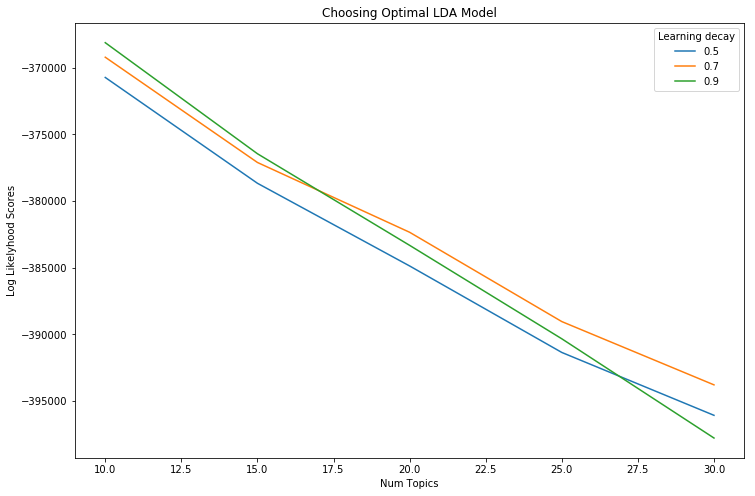

In [27]:
tagText.lda_fin_best_topic_number(data_preprocessed)


In [1]:
tagText.nmf_fin_best_topic_number(data_preprocessed)

NameError: name 'tagText' is not defined

In [ ]:
perfs_lda = tagText.lda_find_topic_number(
                    data_preprocessed,
                    cluster_number_min,
                    cluster_number_max,
                    cluster_number_step
                )


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
mini=min(perfs_lda)
x = range(cluster_number_min,cluster_number_max,cluster_number_step)


plt.bar(x, perfs_lda)
plt.ylabel("Performance")
plt.xlabel("number of topics")
plt.title("performance/number of topics")
plt.show()

plt.bar(x, perfs_lda-mini)
plt.ylabel("Performance-mini")
plt.xlabel("number of topics")
plt.title("performance/number of topics")
plt.show()

In [ ]:
    def lda_predict(
        model,
        text,
        lda,
        lda_df_topic_keywords,
        lda_tf_vectorizer,
        no_top_words
    ):
        '''
        predict tag form text in function of lda, topic ad tf vectorizer
        '''
        text = [text]
        mytext = lda_tf_vectorizer.transform(text)
        lda_topic_probability_scores = lda.transform(mytext)
        lda_topic = lda_df_topic_keywords.iloc[
            tagText.np.argmax(lda_topic_probability_scores),
            :
        ].values.tolist()
        topic_array = model.np.array(lda_topic)
        lda_feature_names = lda_tf_vectorizer.get_feature_names()
        print(lda_topic)
        print(topic_array.argsort())
        print(lda_feature_names)
        return (
            " ".join(
                        [
                            lda_feature_names[i]
                            for i in topic_array.argsort()
                            [
                                :-no_top_words - 1:-1
                            ]
                        ]
                )
        )

In [ ]:
lda_tagText, df_topic_keywords, tf_vectorizer = tagText.lda_prepare_tag(data_preprocessed)

print(lda_predict(tagText, 'I cannot intall a git repository. I try github and gitlab', lda_tagText, df_topic_keywords, tf_vectorizer, 5))
print(tagText.lda_predict( "How to cast number as integer in java", lda_tagText, df_topic_keywords, tf_vectorizer, 5))

In [ ]:
from joblib import dump, load
dump(lda, 'lda.joblib',0)
dump(df_topic_keywords, 'df_lda_topic_keywords.joblib',0)
dump(tf_vectorizer, 'tf_lda_vectorizer.joblib',0)

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
IV.2-b - Data - Tag generator - Unsupervised - MNF</p>

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF
no_features=0
X = data_preprocessed[0:9].unique()

# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95,
    min_df=2,
    max_features=None,
    stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(X)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

no_topics = 5

# Run NMF
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)

no_top_words = 10
display_topics(nmf, tfidf_feature_names, no_top_words)

In [ ]:
perfs_nmf = tagText.nmf_find_topic_number(
                    data_preprocessed,
                    cluster_number_min,
                    cluster_number_max,
                    cluster_number_step
                )

import matplotlib.pyplot as plt
import numpy as np
mini=min(perfs_nmf)
x = range(cluster_number_min,cluster_number_max,cluster_number_step)


plt.bar(x, perfs_nmf)
plt.ylabel("Performance")
plt.xlabel("number of topics")
plt.title("performance/number of topics")
plt.show()

plt.bar(x, perfs_nmf-mini)
plt.ylabel("Performance-mini")
plt.xlabel("number of topics")
plt.title("performance/number of topics")
plt.show()

In [ ]:
nmf_tagText, tfidf_topic_keywords_tagText, tf_vectorizer = tagText.nmf_prepare_tag(data_preprocessed)
            
tagText.nmf_predict('git est un outils de code source.', nmf_tagText, tfidf_topic_keywords_tagText, tf_vectorizer, 5)

In [ ]:
from joblib import dump, load
dump(nmf_tagText, 'nmf.joblib') 
nmfLoad = load('nmf.joblib') 
print(nmfLoad)

In [ ]:
lda_tagText, df_lda_topic_keywords, tf_lda_vectorizer = tagText.lda_prepare_tag_and_save(data_preprocessed)
mnf_tagText, df_nmf_topic_keywords, tf_mnf_vectorizer = tagText.nmf_prepare_tag_and_save(data_preprocessed)

tagText.lda_predict('git est un outils de code source. C\'est bien', lda_tagText, df_lda_topic_keywords, tf_lda_vectorizer, 5)
tagText.nmf_predict('git est un outils de code source. C\'est bien', mnf_tagText, df_nmf_topic_keywords, tf_mnf_vectorizer, 5)


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
IV.3 - Data - Tag generator - Supervised</p>

In [5]:
def superviedTagPurposerFromMessage(message, reload, saveModel):
    tagText = TagText()
    tags = ''
    if reload.lower() == 'true':
        tagText.fileName = 'QuestionVsTags.csv'
        data_question = tagText.read_source()
        if saveModel.lower() == 'true':
            data_preprocessed = data_question['body'].apply(tagText.preprocessing)
            classifier, tags = tagText.supervised_prepare_tag_and_save(data_preprocessed, data_question['SelectedTags'])
            tags = tagText.supervised_predict(message, classifier, tags)
        else:
            data_preprocessed = data_question['body'].apply(tagText.preprocessing)
            classifier, tags = tagText.supervised_prepare_tag(data_preprocessed, data_question['SelectedTags'])
            tags = tagText.supervised_predict(message, classifier, tags)
    else:
        classifier, tags = tagText.supervised_prepare_tag_load()
        tags = tagText.supervised_predict(message, classifier, tags)
    return str(tags)

superviedTagPurposerFromMessage('git est un outils de code source. C\'est bien', 'true', 'False')

TypeError: Singleton array array(<tagText.TagText object at 0x0000021479202B70>, dtype=object) cannot be considered a valid collection.

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
V - Resultat</p>

In [ ]:

import numpy as np
import nltk
import pandas as pd
import os
import sys

sys.path.insert(0, './Python/')

from tagText import TagText


tagText = TagText()
print(tagText.urlDirectory)
print(tagText.fileName)


def supervisedTagPurposer():
    return tagPurposer('supervised', 'This is a test to have tag GIT & branche', 'false', 'false')

def supervisedTagPurposerAndReload():
    return tagPurposer('supervised', 'This is a test to have tag GIT & branche', 'true', 'false')

def supervisedTagPurposerAndReloadAndSave():
    return tagPurposer('supervised', 'This is a test to have tag GIT & branche', 'true', 'true')

def tagLDAPurposer():
    return tagPurposer('LDA', 'This is a test to have tag GIT & branche', 'false', 'false')

def tagLDAPurposerAndReload():
    return tagPurposer('LDA', 'This is a test to have tag GIT & branche', 'true', 'false')

def tagLDAPurposerAndReloadAndSave():
    return tagPurposer('LDA', 'This is a test to have tag GIT & branche', 'true', 'true')

def tagNMFPurposer():
    return tagPurposer('NMF', 'This is a test to have tag GIT & branche', 'false', 'false')

def tagNMFPurposerAndReload():
    return tagPurposer('NMF', 'This is a test to have tag GIT & branche', 'true', 'false')

def tagNMFPurposerAndReloadAndSave():
    return tagPurposer('NMF', 'This is a test to have tag GIT & branche', 'true', 'true')

def tagPurposer(mode, message, reload, saveModel):
    if mode.lower() == 'supervised':
        return superviedTagPurposerFromMessage(message, reload.lower(), saveModel.lower())
    if mode.lower() == 'lda' or mode.lower() =='nmf':
        return unsuperviedTagTFIDFPurposerFromMessage(mode.lower(), message, reload.lower(), saveModel.lower())
    return '/i\\Mode indefined/i\\'

def superviedTagPurposerFromMessage(message, reload, saveModel):
    tagText = TagText()
    tags = ''
    if reload.lower() == 'true':
        data_question = tagText.read_source()
        data_preprocessed = data_question['body'].apply(tagText.preprocessing)
        logistic_regression = tagText.supervised_prepare_tag(data_preprocessed)
        tags = tagText.supervised_predict(message, logistic_regression, 5)
    else:
        logistic_regression = tagText.supervised_prepare_tag_load()
        tags = tagText.supervised_predict(message, logistic_regression, 5)
    return tags

def unsuperviedTagTFIDFPurposerFromMessage(option, message, reloadModel, saveModel):
    tagText = TagText()
    tags = ''
    if option.lower() != 'lda' and option.lower() != 'nmf':
        return '/i\\Mode indefined/i\\'
    if reloadModel.lower() == 'true':
        data_question = tagText.read_source()
        data_preprocessed = data_question['body'].apply(tagText.preprocessing)
        if option.lower() == 'lda':
            if saveModel.lower() == 'true':
                lda_tagText, df_topic_keywords_tagText, tf_vectorizer_tagText = tagText.lda_prepare_tag_and_save(data_preprocessed)
                tags = tagText.lda_predict(message, lda_tagText, df_topic_keywords_tagText, tf_vectorizer_tagText, 5)
            else:
                lda_tagText, df_topic_keywords_tagText, tf_vectorizer_tagText = tagText.lda_prepare_tag(data_preprocessed)
                tags = tagText.lda_predict(message, lda_tagText, df_topic_keywords_tagText, tf_vectorizer_tagText, 5)
        if option.lower() == 'nmf':
            if saveModel.lower() == 'true':
                nmf_tagText, df_topic_keywords_tagText, tf_vectorizer_tagText = tagText.nmf_prepare_tag_and_save(data_preprocessed)
                tags = tagText.nmf_predict(message, nmf_tagText, df_topic_keywords_tagText, tf_vectorizer_tagText, 5)
            else:
                nmf_tagText, df_topic_keywords_tagText, tf_vectorizer_tagText = tagText.nmf_prepare_tag(data_preprocessed)
                tags = tagText.nmf_predict(message, nmf_tagText, df_topic_keywords_tagText, tf_vectorizer_tagText, 5)
    else:
        if option.lower() == 'lda':
            lda_tagText, df_topic_keywords_tagText, tf_vectorizer_tagText = tagText.lda_prepare_tag_load()
            tags = tagText.lda_predict(message, lda_tagText, df_topic_keywords_tagText, tf_vectorizer_tagText, 5)
        if option.lower() == 'nmf':
            nmf_tagText, df_topic_keywords_tagText, tf_vectorizer_tagText = tagText.nmf_prepare_tag_load()
            tags = tagText.nmf_predict(message, nmf_tagText, df_topic_keywords_tagText, tf_vectorizer_tagText, 5)
    return tags


In [ ]:
tagLDAPurposerAndReloadAndSave()

Une API :  https://ejacques.pythonanywhere.com/apiTagGenerator/

Un depot GIT : https://github.com/EricJacquesPro/TextCategorization/